In [1]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
from ipynb.fs.full.prepare import index_df, topk

split RELIANCE 1645.4 2.0112455690013444 818.1
split RELIANCE 2194.7 8.345758072013917 528.9011030752401
split HDFCBANK 2187.75 1.9869669860587622 1101.05
split HDFCBANK 2519.7 19.661766684358625 254.6343263627014
split INFY 1434.25 1.9456691311130707 737.15
split INFY 1975.05 7.548897276749774 509.05366393585496
split INFY 4349.85 116.56160069377809 281.71001962761125
split INFY 3385.65 27348.90761583446 14.429709183719028
split HDFC 3008.95 4.84377012234385 621.2
split ICICIBANK 1794.1 4.953340695748206 362.2
split TCS 3514.1 2.018379713391344 1741.05
split TCS 778.0 8.144572754105939 192.80316652912552
split TCS 1899.7 135.72602072222847 113.99615769064606
split KOTAKBANK 1425.6 2.016122189223589 707.1
split KOTAKBANK 864.6 7.729011898731478 225.53196548821552
split KOTAKBANK 464.75 136.93248427402247 26.232331203070895
split AXISBANK 1985.75 5.022764638927533 395.35


In [2]:
print('Start')

Start


In [3]:
index_df

,RELIANCE,HDFCBANK,INFY,HDFC,ICICIBANK,TCS,KOTAKBANK,HINDUNILVR,AXISBANK
Date,,,,,,,,,
2005-01-07,64.973127,24.934178,0.074987,149.955506,72.415774,9.872462,2.074745,141.05,37.847682
2005-01-10,64.002574,24.908748,0.072943,150.801954,70.437311,9.780365,2.084969,142.75,38.245869
2005-01-11,62.996075,24.585787,0.072092,148.954220,70.810796,9.679426,1.990762,141.15,37.419631
2005-01-12,62.091424,24.461179,0.069701,149.078090,69.670152,9.563752,1.921385,139.40,36.105614
2005-01-13,62.319084,25.374119,0.071972,148.582609,71.477014,9.525808,1.989302,140.05,34.970781
...,...,...,...,...,...,...,...,...,...
2021-04-26,1937.850000,1404.800000,1343.550000,2509.800000,591.100000,3100.800000,1759.650000,2360.65,700.450000
2021-04-27,1988.650000,1438.700000,1348.500000,2518.400000,598.750000,3132.000000,1750.300000,2379.85,699.550000
2021-04-28,1997.300000,1476.800000,1356.000000,2577.000000,621.350000,3124.100000,1811.450000,2406.55,708.150000


In [4]:
# index_df.plot(kind='line',y='LT',color='red')

In [5]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(index_df, compounding=True)

In [6]:
mu

RELIANCE      0.237850
HDFCBANK      0.286014
INFY          0.841863
HDFC          0.189236
ICICIBANK     0.140899
TCS           0.428985
KOTAKBANK     0.521663
HINDUNILVR    0.191715
AXISBANK      0.200953
dtype: float64

In [7]:
expected_returns.mean_historical_return(index_df, compounding=False)

RELIANCE      0.290637
HDFCBANK      0.315050
INFY          7.862403
HDFC          0.236050
ICICIBANK     0.216091
TCS           0.739331
KOTAKBANK     0.811720
HINDUNILVR    0.214057
AXISBANK      0.272611
dtype: float64

In [8]:
S = risk_models.exp_cov(index_df)

In [9]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
ef

In [10]:
# raw_weights = ef.max_sharpe()

# w = ef.nonconvex_objective(objective_functions.sharpe_ratio, objective_args=(ef.expected_returns, ef.cov_matrix), weights_sum_to_one=True)

In [11]:
# raw_weights

In [12]:
# cleaned_weights = ef.clean_weights()
# ef.save_weights_to_file("weights.csv")  # saves to file
# print(cleaned_weights)
# ef.portfolio_performance(verbose=True)

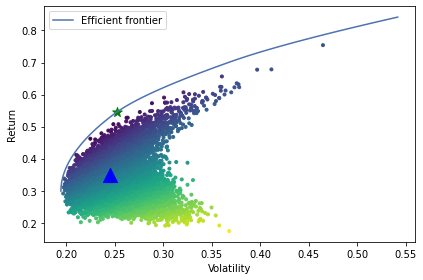

In [13]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
raw_weights = ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="g", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Nifty Top
nifty = np.array([(topk["WEIGHTAGE(%)"]/sum(topk["WEIGHTAGE(%)"])).values])
rets1 = nifty.dot(mu)
stds1 = np.sqrt(np.diag(nifty @ S @ nifty.T))
ax.scatter(stds1, rets1, marker="^", c='b', s=200)

# # Output
# ax.set_title("Efficient Frontier with random portfolios")
# ax.legend()
# plt.tight_layout()
# plt.savefig("ef_scatter.png", dpi=200)
# plt.show()

In [14]:
# nifty.dot(mu)
# w.dot(mu).shape
# np.sqrt(np.diag(w @ S @ w.T)).shape
rets1
# stds1

array([0.3494463])

In [15]:
np.sqrt(np.diag(nifty @ S @ nifty.T)).shape

(1,)

In [16]:
nifty * S

,RELIANCE,HDFCBANK,INFY,HDFC,ICICIBANK,TCS,KOTAKBANK,HINDUNILVR,AXISBANK
RELIANCE,0.019174,0.007469,0.004650,0.004972,0.006003,0.002778,0.002661,0.001389,0.002650
HDFCBANK,0.008237,0.018093,0.004144,0.010680,0.011066,0.001919,0.004818,0.001004,0.003656
INFY,0.005952,0.004811,0.043097,0.003603,0.002809,0.005419,0.002829,0.001493,0.001204
HDFC,0.007882,0.015351,0.004462,0.016174,0.012722,0.002347,0.005200,0.001343,0.004499
ICICIBANK,0.009905,0.016556,0.003621,0.013241,0.019703,0.001898,0.005595,0.001104,0.006705
TCS,0.005863,0.003673,0.008933,0.003125,0.002428,0.006553,0.001204,0.001461,0.000956
KOTAKBANK,0.007459,0.012243,0.006193,0.009194,0.009503,0.001599,0.007797,0.001326,0.003459
HINDUNILVR,0.004477,0.002934,0.003761,0.002731,0.002157,0.002233,0.001525,0.003544,0.000744
AXISBANK,0.010276,0.012855,0.003647,0.011006,0.015760,0.001757,0.004787,0.000895,0.009024


In [17]:
topk["WEIGHTAGE(%)"]/sum(topk["WEIGHTAGE(%)"])

0    0.187846
1    0.170331
2    0.146738
3    0.118499
4    0.113852
5    0.089008
6    0.067024
7    0.058266
8    0.048436
Name: WEIGHTAGE(%), dtype: float64

In [18]:
raw_weights

OrderedDict([('RELIANCE', 0.0),
             ('HDFCBANK', 0.0),
             ('INFY', 0.1974132196509596),
             ('HDFC', 0.0),
             ('ICICIBANK', 0.0),
             ('TCS', 0.4157200297654416),
             ('KOTAKBANK', 0.3868667505835988),
             ('HINDUNILVR', 0.0),
             ('AXISBANK', 0.0)])